#PROBLEM STATEMENT: Email spam detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1') # Try reading the file with 'latin-1' encoding.
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.shape

(5572, 5)

In [ ]:
# total no of NAN values in dataset
data.isnull().sum().sum()

16648

In [ ]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
 # renaming the cols
data.rename(columns={'v1': 'catagory','v2': 'message'},inplace=True)
data.head()

,catagory,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data['v1'] = data['catagory'].map({'spam': 0, 'ham': 1})
data['v1'] = data['message'].map({'spam': 0, 'ham': 1})

In [ ]:
new_data=data.drop(['Unnamed: 2',	'Unnamed: 3','Unnamed: 4','v1'],axis=1)
new_data.head()

,catagory,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   catagory  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
new_data.isnull().sum(axis=0).sort_values()# we can check the data having Nan data

,0
catagory,0
message,0


In [ ]:
new_data.shape

(5572, 2)

In [ ]:
new_data['catagory'] = new_data['catagory'].map({'spam': 0, 'ham': 1})


#visualization of dataset

<Axes: xlabel='catagory', ylabel='count'>

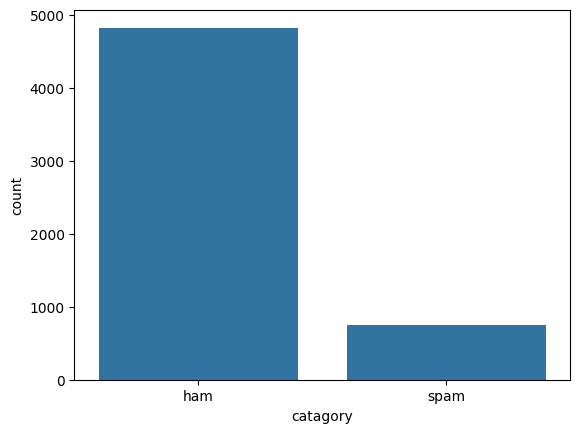

In [ ]:
sns.countplot(x='catagory',data=data)

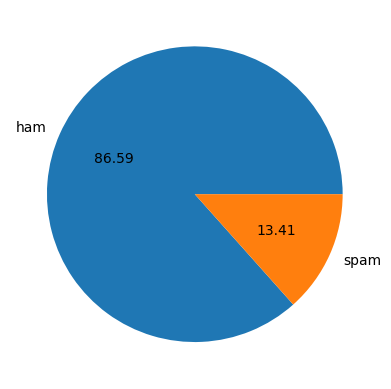

In [ ]:
plt.pie(data['catagory'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


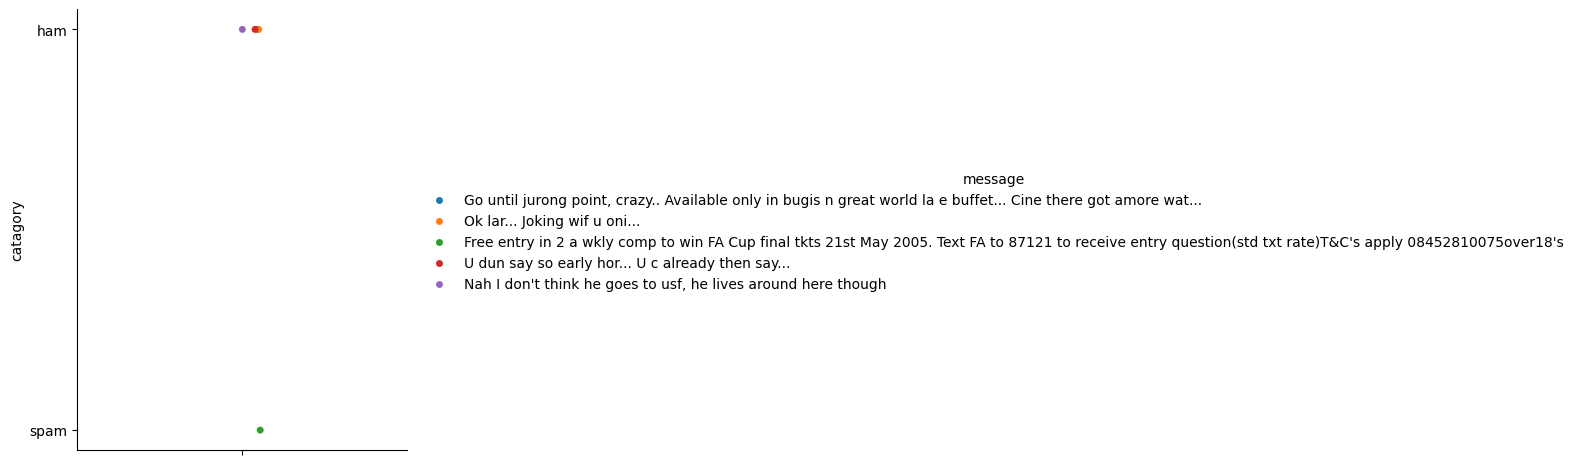

In [ ]:
sns.catplot(y='catagory',hue='message',data=data[0:5])

# now applying algorithms

In [ ]:
#Divide the data into dependent and independent set
#Divide the data into dependent and independent set
x=new_data.drop(columns=['catagory'])
y=new_data['catagory']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=0)

#Feature Extraction - TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [ ]:
# TF-IDF feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(x_train)
X_test_features = feature_extraction.transform(x_test)



In [ ]:
regression.fit(x_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_predict_regression=regression.predict(x_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac=accuracy_score(y_test,y_predict_regression)
cm=confusion_matrix(y_test,y_predict_regression)

In [ ]:
print(ac)
print(cm)

#applying knn method


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #where k=5

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
y_predict_knn=knn.predict(x_test)

In [ ]:
ac=accuracy_score(y_test,y_predict_knn)
cm=confusion_matrix(y_test,y_predict_knn)

In [ ]:
print(ac)
print(cm)

#now we checked with decion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

In [ ]:
y_predict_tree=tree.predict(x_test)

In [ ]:
ac=accuracy_score(y_test,y_predict_tree)
cm=confusion_matrix(y_test,y_predict_tree)

In [ ]:
print(ac)
print(cm)

#Now we check with random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()

In [ ]:
random.fit(x_train,y_train)
y_predict_random=random.predict(x_test)

In [ ]:
ac=accuracy_score(y_test,y_predict_random)
cm=confusion_matrix(y_test,y_predict_random)
print(ac)
print(cm)

#Now we check with AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=20)

In [ ]:
ada_classifier.fit(x_train,y_train)
y_predict_ada=ada_classifier.predict(x_test)

In [ ]:
ac=accuracy_score(y_test,y_predict_ada)
cm=confusion_matrix(y_test,y_predict_ada)
print(ac)
print(cm)

#now we check with svm

In [ ]:
from sklearn import svm
clt=svm.SVC(kernel='linear')

#Now applying test data for finding result.

In [ ]:
test_data.head()

In [ ]:
test_data.isnull().sum()

In [ ]:
#spilting the data into training and testing set.
from sklearn.model_selection import train_test_split
x1_train, x1_test = train_test_split(test_data, test_size=0.1, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_test=DecisionTreeClassifier()

In [ ]:
tree_test.fit(x_train,y_train)

In [ ]:
y_predict_test=tree_test.predict(x_test)

In [ ]:
y_predict_test

In [ ]:
print('Airline customer satisfaction prediction ',y_predict_test)